In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
USDA = pd.read_csv('USDA.csv')

In [4]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-

In [4]:
Auto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


1. Draw a scatter plot showing the relationship between the horsepower and price of the automobiles. 

Text(0, 0.5, 'Price')

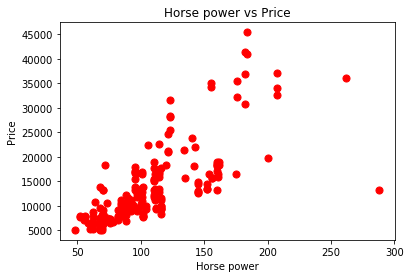

In [9]:
plt.figure()
plt.scatter(Auto['horsepower'],Auto['price'],s=50,c='red')
plt.title('Horse power vs Price')
plt.xlabel('Horse power')
plt.ylabel('Price')

2. Write a code to generate following graph on automobile dataset using pandas and matplotlib. 

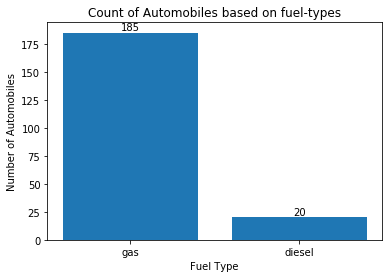

In [14]:
FT=Auto['fuel-type'].unique()
NOV =Auto['fuel-type'].value_counts()
plt.figure()
plot = plt.bar(FT,NOV, width = 0.8)
plt.title('Count of Automobiles based on fuel-types')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Automobiles')

 #Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2,
             1.005*height,'%d' % int(height), ha='center', va='bottom')
    
plt.show()

3. Draw a histogram on normalized lossess of automobiles.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc905278198>]],
      dtype=object)

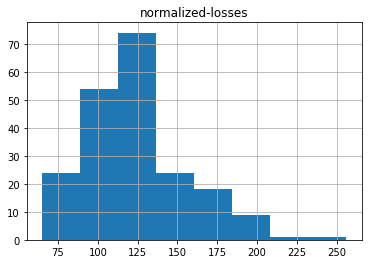

In [8]:
Auto.hist('normalized-losses',bins=8)

4. Write a code to generate following graph on automobile dataset using pandas, matplotlib and seaborn

<Figure size 1080x1080 with 0 Axes>

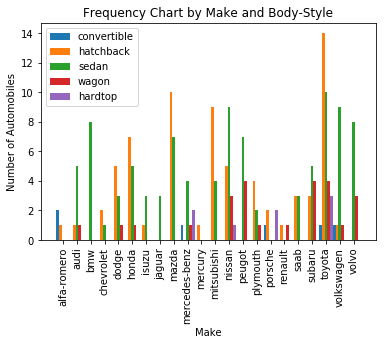

In [141]:
categorycount=Auto.groupby(['make','body-style'],as_index=False).count()
categorycount=categorycount.loc[0:55,['make','body-style','symboling']]
categorycount.rename(columns={'symboling':'count'},inplace=True)

make_uniq = pd.DataFrame()
make_uniq["make"] =categorycount.make
make_uniq = make_uniq.drop_duplicates()

convertible_bs =  categorycount[categorycount["body-style"] == 'convertible']
merge_convertible_df = make_uniq.merge(convertible_bs,on='make',how='left')
merge_convertible_df['count'].fillna(0,inplace=True)
convertible_counts = merge_convertible_df['count']
convertible_counts

hatchback_bs =  categorycount[categorycount["body-style"] == 'hatchback']
merge_hatchback_df =make_uniq.merge(hatchback_bs,on='make',how='left')
merge_hatchback_df['count'].fillna(0,inplace=True)
hatchback_counts = merge_hatchback_df['count']
hatchback_counts

sedan_bs =  categorycount[categorycount["body-style"] == 'sedan']
merge_sedan_df =make_uniq.merge(sedan_bs,on='make',how='left')
merge_sedan_df['count'].fillna(0,inplace=True)
sedan_counts = merge_sedan_df['count']
sedan_counts

wagon_bs =  categorycount[categorycount["body-style"] == 'wagon']
merge_wagon_df =make_uniq.merge(wagon_bs,on='make',how='left')
merge_wagon_df['count'].fillna(0,inplace=True)
wagon_counts = merge_wagon_df['count']
wagon_counts

hardtop_bs =  categorycount[categorycount["body-style"] == 'hardtop']
merge_hardtop_df =make_uniq.merge(hardtop_bs,on='make',how='left')
merge_hardtop_df['count'].fillna(0,inplace=True)
hardtop_counts = merge_hardtop_df['count']
hardtop_counts

labels = merge_convertible_df['make']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
width1 =1

plt.figure(figsize=(15,15))
fig, ax = plt.subplots()


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Make')
ax.set_ylabel('Number of Automobiles')
ax.set_title('Frequency Chart by Make and Body-Style')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.bar(x - (width1/5)*2, convertible_counts, width, label='convertible')
ax.bar(x - (width1/5), hatchback_counts, width, label='hatchback')
ax.bar(x , sedan_counts, width, label='sedan')
ax.bar(x + width1/5, wagon_counts, width, label='wagon')
ax.bar(x + (width1/5)*2, hardtop_counts, width, label='hardtop')

plt.xticks(rotation=90)
ax.legend()

plt.show()


5. Draw a boxplot for price of automobiles based on body-style using seaborn.

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

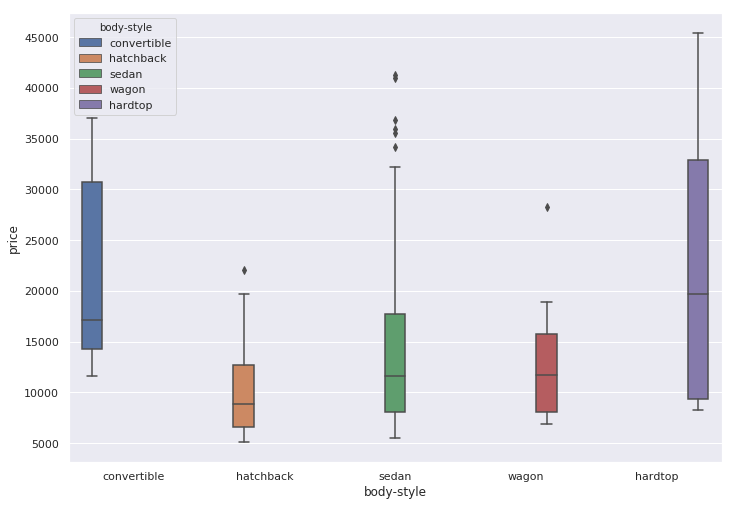

In [15]:
sns.boxplot(x='body-style',y='price',data=Auto,hue='body-style')